In [1]:
import jieba, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("score_3.csv")
content = df['content'].head(1000).dropna()

In [3]:
with open('stopwords.txt') as f:
    stopwords = f.read().splitlines()

In [4]:
def tokenize(sentence):
    without_duplicates = re.sub(r'(.)\1+', r'\1\1', sentence)
    without_punctuation = re.sub(r'[^\w]', '', without_duplicates)
    return jieba.lcut(without_punctuation)

In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords, tokenizer=jieba.lcut)
X = vectorizer.fit_transform(content)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kf/czq3bwv96k7__xcnjrbpf33c0000gp/T/jieba.cache
Loading model cost 0.921 seconds.
Prefix dict has been built succesfully.
/Users/kgd/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['\\', 'n', '借傥', '兼', '前', '唷', '啪', '啷', '喔', '天', '始', '漫', '然', '特', '竟', '莫', '见', '设', '达'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [7]:
print(X[3:4])

  (0, 5169)	0.15326407765011477
  (0, 3656)	0.21272541740292505
  (0, 5637)	0.07988358999296995
  (0, 835)	0.32998132960343285
  (0, 2515)	0.12395669640455806
  (0, 2929)	0.33277486323623934
  (0, 3611)	0.21867203798388063
  (0, 2136)	0.15668231880219666
  (0, 1703)	0.2821012092936038
  (0, 3641)	0.33277486323623934
  (0, 1825)	0.2821012092936038
  (0, 2967)	0.300803347241647
  (0, 5388)	0.33277486323623934
  (0, 372)	0.18161607880201164
  (0, 966)	0.300803347241647
  (0, 3906)	0.15141882568726664


In [8]:
centers = range(20, 30)
models = [KMeans(n_clusters=i) for i in centers]
score = [models[i].fit(X).score(X) for i in range(len(models))]

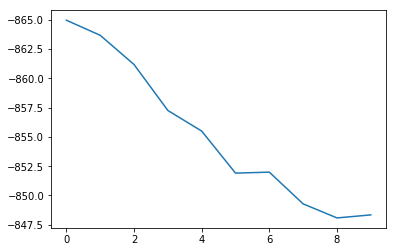

In [9]:
plt.gca().invert_yaxis()
plt.plot(score)

In [13]:
print("Top terms per cluster:")
order_centroids = models[8].cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("X")
    top_ten_words = [terms[ind] for ind in order_centroids[i, :15]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
X
Cluster 0: 不好 服务 态度 设施 周边环境 行 沟通 酒店 床太硬 延迟 航班 觉 店 房间 退
X
Cluster 1: 价格 一个 房间 贵 酒店 很小 极其 差 高 两个 一天 成正比 符合 相符 大柱子
X
Cluster 2: 
 酒店 . 没有 服务员 房间   入住 一一 建议 真的 差 前台 不想 携程
X
Cluster 3: 不会 味道 住 酒店 房间 入住 重 非常 装修 再来 没有 无可奈何 之差 再住 下次
